In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


The Chance of Admission mainly depends on following parameters:

GRE Score

TOEFL Score

CGPA

University Rating

SOP

LOR

All independent features follow direct relationship with the output label


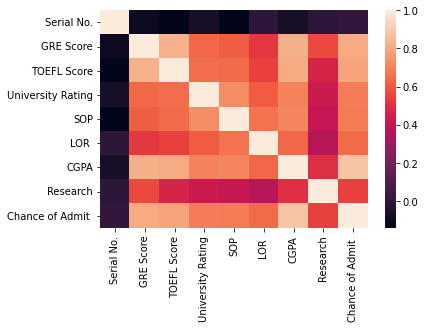

In [10]:
sb.heatmap(df.corr())

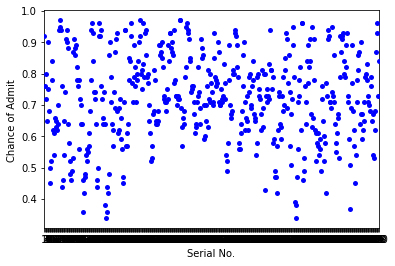

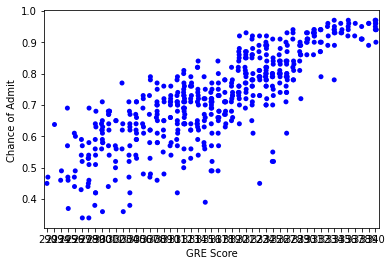

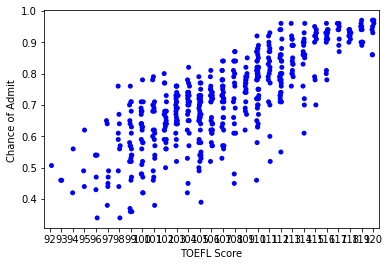

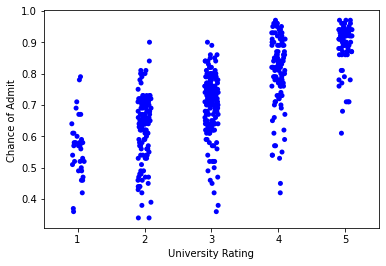

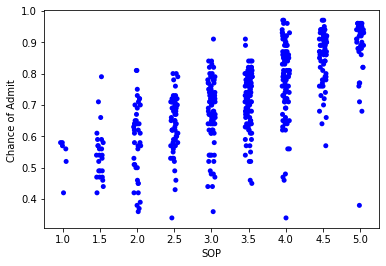

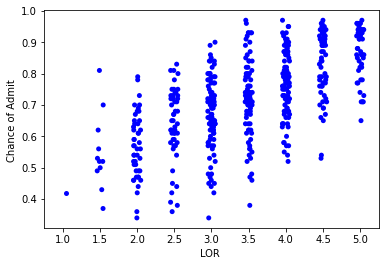

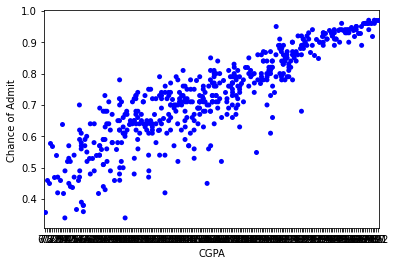

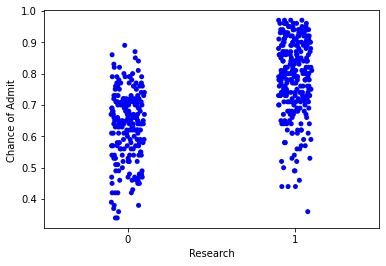

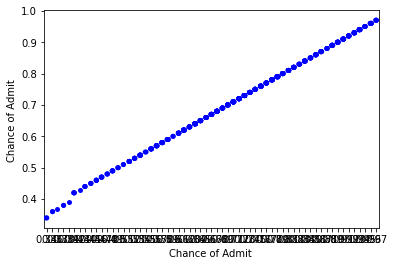

In [24]:
for i, col in enumerate(df.columns):
      plt.figure(i)
      sb.stripplot(x = df[col], y = df["Chance of Admit "],color = "b")
      plt.show()

GRE Score , TOEFL Score, CGPA follow approximately linear relationship with output label.

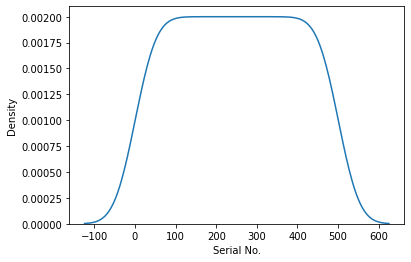

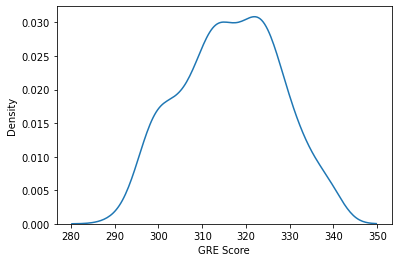

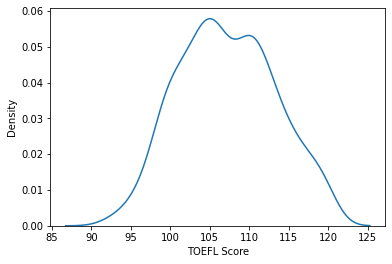

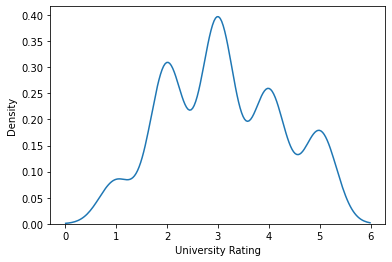

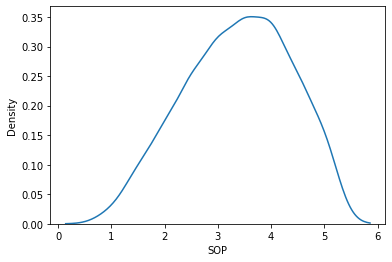

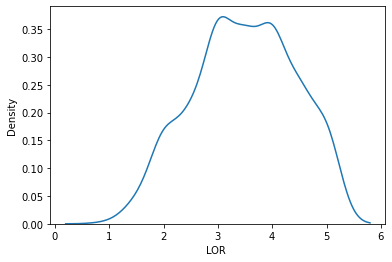

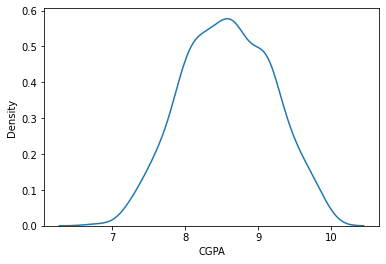

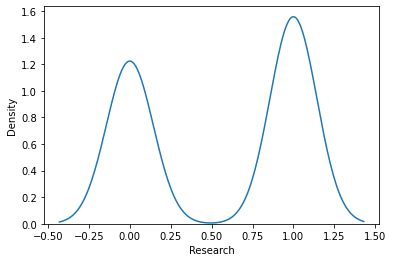

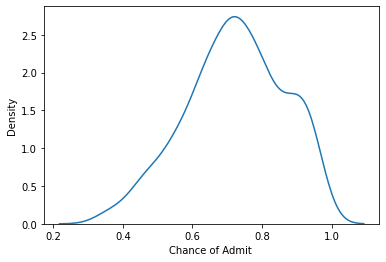

In [26]:
for i, col in enumerate(df.columns):
      plt.figure(i)
      sb.kdeplot(x = df[col])
      plt.show()

GRE SCORE,

TOEFL SCORE,

LOR,

SOP,

CGPA 

follow normal disrtibution

---



The output label is continuous hence we apply regression  

Splitting the dataset

In [29]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,
                                                 random_state = 25)

Applying Standard Scaler

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_new = sc.fit_transform(x_train)

Model Training

SVR

In [40]:
from sklearn.svm import LinearSVR
svreg = LinearSVR()
svreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR()

In [41]:
svreg.score(x_train,y_train)

0.6051352858950869

In [51]:
svreg.coef_

array([ 1.56297149e-05, -1.42832921e-03,  5.85658743e-03,  3.32367712e-02,
        1.85095576e-02,  2.89504256e-02,  2.63526313e-02,  2.33021689e-02])

In [52]:
svreg.intercept_

array([-0.00341794])

*For test dataset*

Scaling the test dataset

In [61]:
sc.transform(x_test)

array([[ 1.02830822, -0.27422337, -2.06571769, -1.15560472, -0.95924558,
        -2.29473806, -0.76969854, -1.22474487],
       [ 0.80999272,  0.52088305, -0.4931555 , -0.1989783 ,  0.13080622,
         0.46336057,  0.40969969,  0.81649658],
       [-1.59852011, -1.06932979, -0.33589928, -2.11223115, -0.41421968,
        -2.29473806, -1.81620684, -1.22474487],
       [-0.07735411,  0.43253789,  1.07940669,  0.75764813,  0.67583212,
         1.56660002,  0.87481449, -1.22474487],
       [-0.21820281,  1.22764431,  0.92215047,  1.71427456,  1.76588392,
         0.46336057,  1.1904281 ,  0.81649658],
       [ 0.42265879,  0.87426368,  1.39391913, -0.1989783 ,  0.13080622,
         0.46336057,  0.90803697,  0.81649658],
       [-1.59147767, -0.80429431,  0.13586937, -1.15560472,  0.67583212,
        -0.08825916, -1.48398198, -1.22474487],
       [ 0.67618646,  1.58102494,  1.39391913,  0.75764813,  0.67583212,
        -0.08825916,  1.57248668,  0.81649658],
       [-1.70415664,  1.58102494

In [62]:
y_pred = svreg.predict(x_test)

In [66]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.683194577992758

In [70]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))


0.07007417847550926
0.006669592527121247
0.0816675732902677


##Ridge

Ridge Regression 

In [71]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1)
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [72]:
ridge.score(x_train,y_train)

0.8189736803278104

In [73]:
ridge.coef_

array([8.91732117e-05, 2.41959315e-03, 1.90742809e-03, 8.32478047e-03,
       5.81222715e-03, 1.53463621e-02, 1.10383493e-01, 1.99703590e-02])

In [74]:
ridge.intercept_

-1.3261668635475914